In [36]:
from __future__ import print_function
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
dta=[10930,10318,10595,10972,7706,6756,9092,10551,9722,10913,11151,8186,6422, 
6337,11649,11652,10310,12043,7937,6476,9662,9570,9981,9331,9449,6773,6304,9355, 
10477,10148,10395,11261,8713,7299,10424,10795,11069,11602,11427,9095,7707,10767, 
12136,12812,12006,12528,10329,7818,11719,11683,12603,11495,13670,11337,10232, 
13261,13230,15535,16837,19598,14823,11622,19391,18177,19994,14723,15694,13248, 
9543,12872,13101,15053,12619,13749,10228,9725,14729,12518,14564,15085,14722, 
11999,9390,13481,14795,15845,15271,14686,11054,10395]

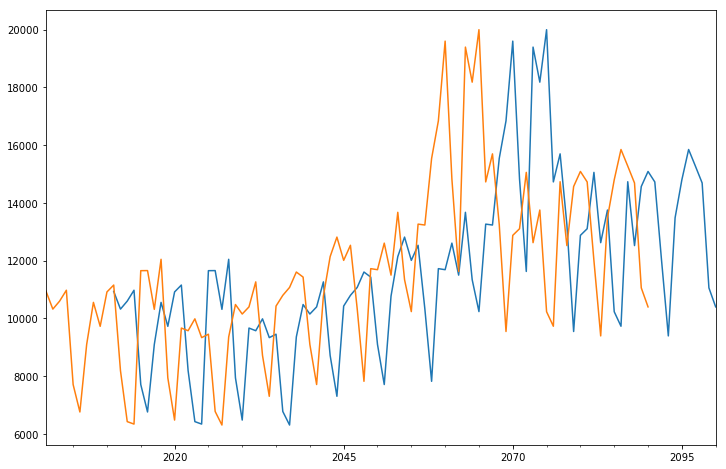

In [20]:
dta=pd.Series(dta)
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('2001','2090'))
dta.plot(figsize=(12,8))
plt.show()

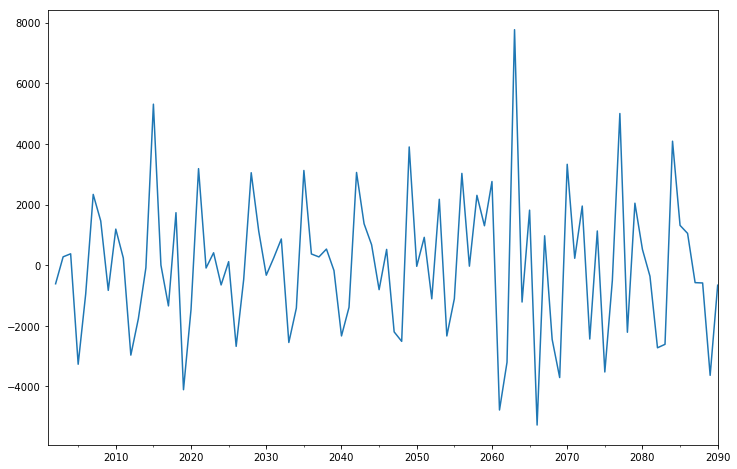

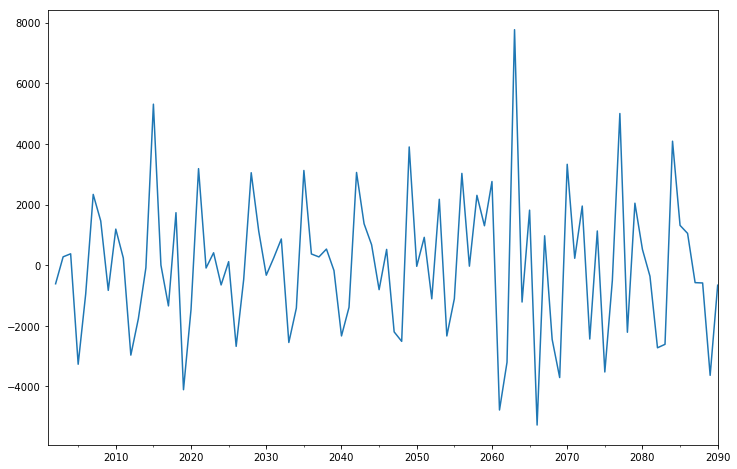

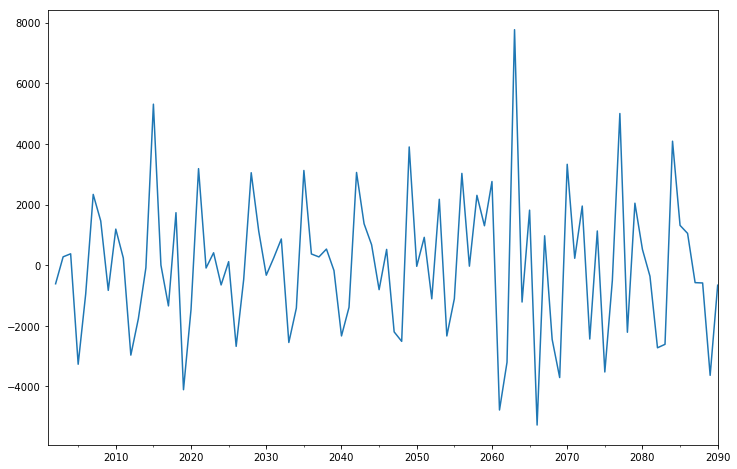

In [23]:
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
diff1 = dta.diff(1)
diff1.plot(ax=ax1)
plt.show()

In [38]:
fig = plt.figure(figsize=(12,8))
ax2= fig.add_subplot(111)
diff2 = dta.diff(2)
diff2.plot(ax=ax2)
plt.show()

AttributeError: 'list' object has no attribute 'diff'

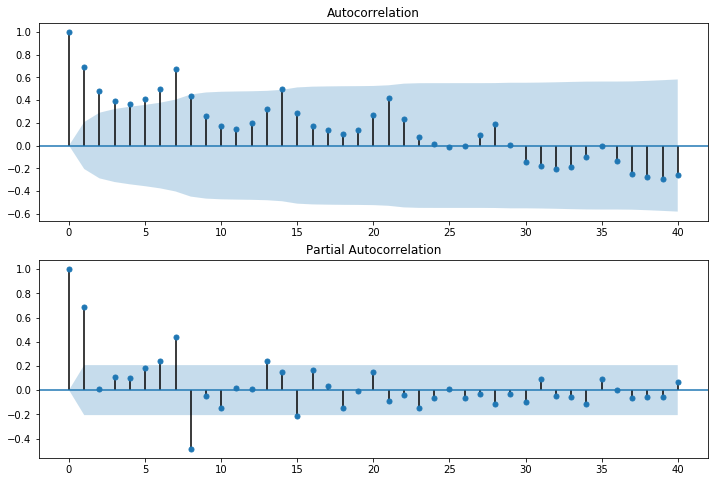

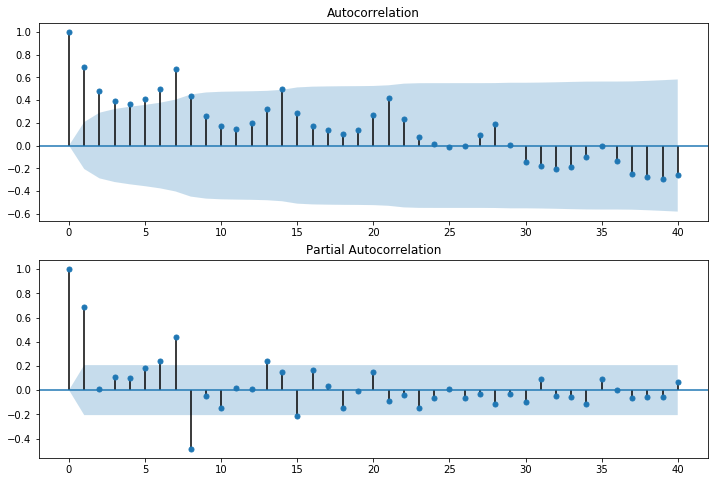

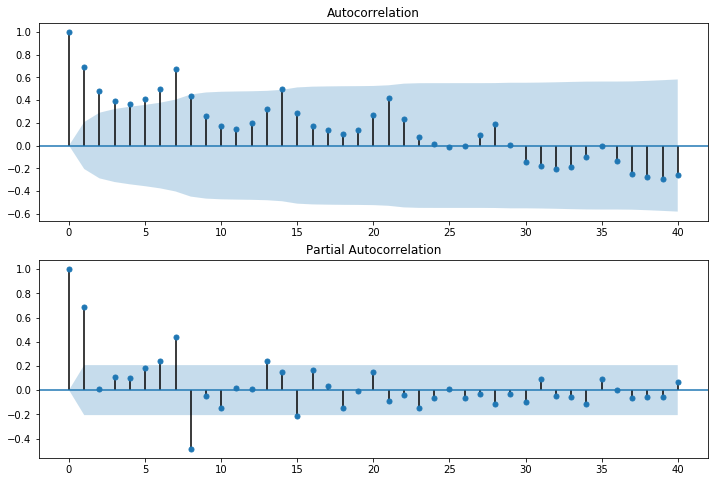

In [26]:
diff1= dta.diff(1)
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta,lags=40,ax=ax2)
plt.show()

In [27]:
arma_mod70 = sm.tsa.ARMA(dta,(7,0)).fit()
print(arma_mod70.aic,arma_mod70.bic,arma_mod70.hqic)
arma_mod30 = sm.tsa.ARMA(dta,(0,1)).fit()
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)
arma_mod71 = sm.tsa.ARMA(dta,(7,1)).fit()
print(arma_mod71.aic,arma_mod71.bic,arma_mod71.hqic)
arma_mod80 = sm.tsa.ARMA(dta,(8,0)).fit()
print(arma_mod80.aic,arma_mod80.bic,arma_mod80.hqic)

1619.1917606904217 1641.69004772 1628.2643925
1657.217262670754 1664.71669168 1660.24147327


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1605.6866109245643 1630.68470763 1615.76731293
1597.9359861122246 1622.93408282 1608.01668812


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


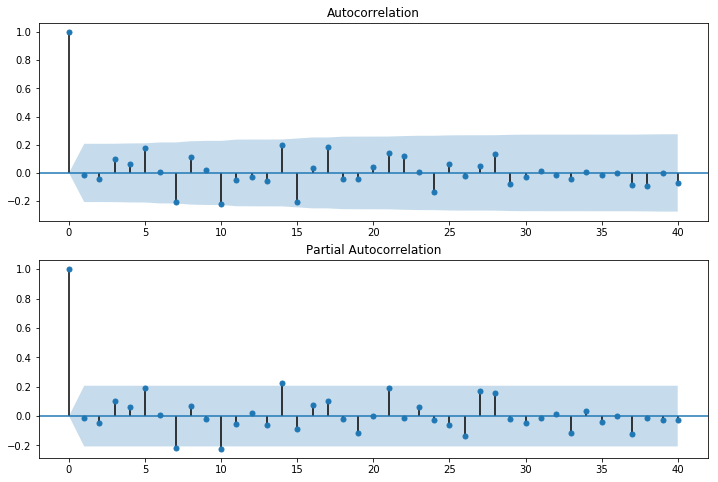

In [28]:
resid = arma_mod80.resid 
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)
plt.show()

NormaltestResult(statistic=7.3461763140498615, pvalue=0.025397915962991915)


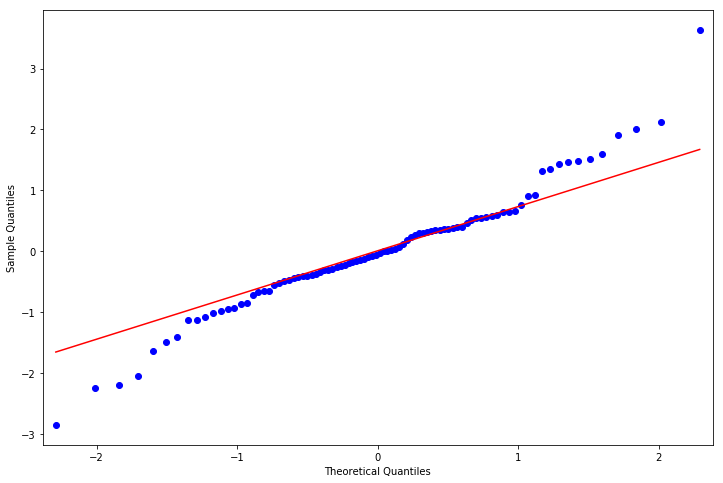

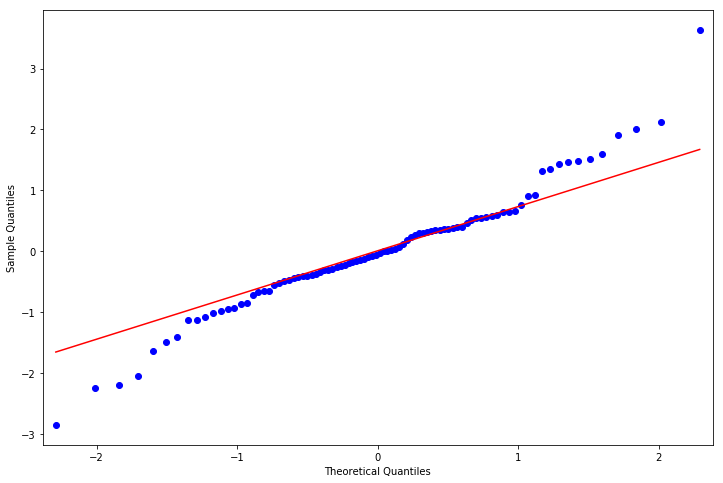

In [30]:
print(stats.normaltest(resid))
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)
plt.show()

In [31]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0  -0.014732   0.020192  0.887002
2.0  -0.045578   0.215649  0.897785
3.0   0.101598   1.198026  0.753478
4.0   0.063365   1.584594  0.811558
5.0   0.176165   4.607685  0.465606
6.0   0.004996   4.610146  0.594694
7.0  -0.209087   8.971346  0.254720
8.0   0.115698  10.323018  0.243082
9.0   0.020922  10.367763  0.321541
10.0 -0.220104  15.381902  0.118746
11.0 -0.050658  15.650865  0.154595
12.0 -0.031527  15.756376  0.202651
13.0 -0.055351  16.085833  0.244526
14.0  0.195320  20.242179  0.122689
15.0 -0.204409  24.855036  0.051924
16.0  0.034571  24.988766  0.070024
17.0  0.181462  28.723685  0.037161
18.0 -0.043320  28.939501  0.049123
19.0 -0.045314  29.178959  0.063222
20.0  0.044193  29.409975  0.079995
21.0  0.141929  31.827224  0.060950
22.0  0.118179  33.527824  0.054825
23.0  0.004496  33.530321  0.072261
24.0 -0.133601  35.769590  0.057776
25.0  0.061821  36.256430  0.067798
26.0 -0.021822  36.318038  0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1724: FutureWarning: TimeSeries is deprecated. Please use Series
  forecast = TimeSeries(forecast, index=self.data.predict_dates)


2090-12-31     9542.058915
2091-12-31    12906.777449
2092-12-31    13979.787801
2093-12-31    14499.775075
2094-12-31    13892.523357
2095-12-31    13247.638324
2096-12-31    10959.111956
2097-12-31    10070.705333
2098-12-31    12681.061470
2099-12-31    13473.569358
2100-12-31    13612.585659
Freq: A-DEC, dtype: float64


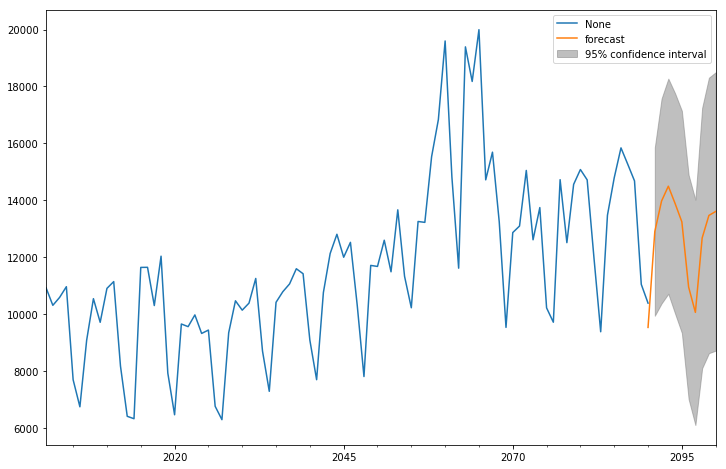

In [35]:
predict_dta = arma_mod80.predict('2090', '2100', dynamic=True)
print(predict_dta)
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.ix['2000':].plot(ax=ax)
fig = arma_mod80.plot_predict('2090', '2100', dynamic=True, ax=ax, plot_insample=False)
plt.show()